## Efekt Rungego

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = lambda x : 1/(1+25*x**2)

In [15]:
def PolynomialReg(X,y,degree):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression()).fit(X,y)

In [27]:
#Estymacja regresji wielomianowych na 210 wartościach funkcji
X = np.arange(-1.0,1.1,0.01).reshape(-1,1)
y = np.array([f(x) for x in X])
degrees = [2,10,50,100,200,300,400,500,1000]
models = [PolynomialReg(X, y, degree) for degree in degrees]

In [28]:
#Estymacja maksymalnego błędu predykcji na większej liczbie punktów
X2 = np.arange(-1.0,1.1,0.0001).reshape(-1,1)
y2 = np.array([f(x) for x in X2])
predictions = [m.predict(X2) for m in models]
max_error = [max(np.abs(y2-e))[0] for e in predictions]
max_error

[0.5091622079487905,
 0.16693738586131462,
 0.003989135407370822,
 49.62341163100535,
 1440242.8769676038,
 2010780344.6434345,
 17303434340.29856,
 590373057499.5039,
 901364955699813.5]

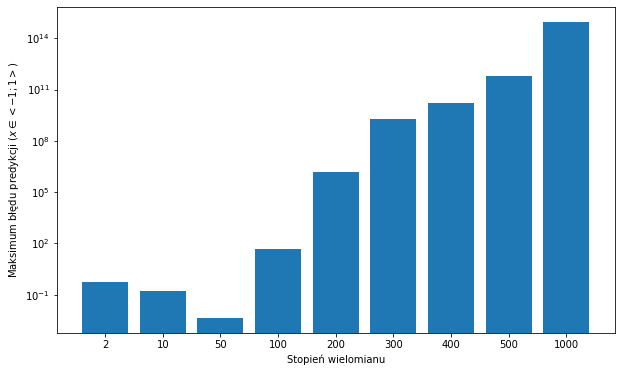

In [29]:
plt.figure(figsize=(10, 6))
plt.bar([str(d) for d in degrees],max_error,log=1)
plt.ylabel("Maksimum błędu predykcji ($x \in <-1;1>$)")
plt.xlabel("Stopień wielomianu");